In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

dt_qzvpp=pd.read_pickle('data_def2_qzvpp')
dt_tzvp=pd.read_pickle('data_def2_tzvp')
dt_sto3g=pd.read_pickle("data_sto3G")
dt_sto6g=pd.read_pickle("data_sto6G")
dt_321g=pd.read_pickle("data_321G")
dt_631g=pd.read_pickle("data_631G")
dt_aug=pd.read_pickle("data_aug")
dt_ccpvtz=pd.read_pickle("data_ccpvtz")

In [3]:
basisSets=['sto3G', 'sto6G', '321G','631G*','def2-TZVP','def2-QZVPP','cc-pVTZ','aug-cc-pVQZ']
molecule_list=['HAl','HeMg','LiNa','BeNe','BF','CO','NN']
molecules={'HAl':1,'HeMg':2,'LiNa':3,'BeNe':4,'BF':5,'CO':6,'NN':7}
datasets=[dt_sto3g,dt_sto6g,dt_321g,dt_631g,dt_ccpvtz,dt_aug,dt_tzvp,dt_qzvpp]

In [4]:
df=dt_sto3g.query("alchemy==0").copy()
df['deltaZ']=[molecules[x] for x in df.target]
df['deltaZ']-=[molecules[x] for x in df.ref]
df['deltaZ']=np.abs(df['deltaZ'])
df['bs_err']=np.abs(df.e_at_ref_bs-df.e_ccsd)
np.percentile(df.query("deltaZ==2 ").bs_err,q=1)

6.723018763078753

In [5]:
for mol in molecule_list:
    print(molecules[mol])

1
2
3
4
5
6
7


In [6]:
dt_tzvp[:10]

,alchemy,distance,basis_set,e_alch,e_ccsd,ref,target,abs_err,delta_rho,e_at_ref_bs,err_alch
0,0,1.3,def2-TZVP,-198.264071,-200.900798,HAl,HeMg,2.636727,3.75217,-199.911285,1.647214
1,1,1.3,def2-TZVP,-199.783769,-200.900798,HAl,HeMg,1.117029,3.75217,-199.911285,0.127516
2,2,1.3,def2-TZVP,-199.933676,-200.900798,HAl,HeMg,0.967122,3.75217,-199.911285,-0.022391
3,3,1.3,def2-TZVP,-199.924468,-200.900798,HAl,HeMg,0.976330,3.75217,-199.911285,-0.013183
4,4,1.3,def2-TZVP,-199.911379,-200.900798,HAl,HeMg,0.989419,3.75217,-199.911285,-0.000095
5,0,1.4,def2-TZVP,-198.574939,-201.247330,HAl,HeMg,2.672391,3.80592,-200.258950,1.684010
6,1,1.4,def2-TZVP,-200.135536,-201.247330,HAl,HeMg,1.111794,3.80592,-200.258950,0.123413
7,2,1.4,def2-TZVP,-200.285113,-201.247330,HAl,HeMg,0.962218,3.80592,-200.258950,-0.026163
8,3,1.4,def2-TZVP,-200.270706,-201.247330,HAl,HeMg,0.976625,3.80592,-200.258950,-0.011756
9,4,1.4,def2-TZVP,-200.258703,-201.247330,HAl,HeMg,0.988627,3.80592,-200.258950,0.000246


In [7]:
df=dt_tzvp.query("alchemy==0 ").copy()
df['deltaZ']=[molecules[x] for x in df.target]
df['deltaZ']-=[molecules[x] for x in df.ref]
df['deltaZ']=np.abs(df['deltaZ'])
df[::100]
df['bs_err']=np.abs(df.e_at_ref_bs-df.e_ccsd)
df.query("deltaZ==2 &distance==2.")  #.quantile(q=.66)

,alchemy,distance,basis_set,e_alch,e_ccsd,ref,target,abs_err,delta_rho,e_at_ref_bs,err_alch,deltaZ,bs_err
135,0,2.0,def2-TZVP,-157.476670,-168.929201,HAl,LiNa,11.452531,6.402477,-164.918573,7.441902,2,4.010628
835,0,2.0,def2-TZVP,-130.642152,-143.139697,HeMg,BeNe,12.497544,6.502722,-139.011976,8.369824,2,4.127721
1235,0,2.0,def2-TZVP,-230.405220,-242.367943,LiNa,HAl,11.962723,6.402477,-237.163180,6.757960,2,5.204763
1535,0,2.0,def2-TZVP,-111.453182,-124.425245,LiNa,BF,12.972062,6.506441,-120.582641,9.129459,2,3.842604
1935,0,2.0,def2-TZVP,-189.955919,-202.206240,BeNe,HeMg,12.250322,6.502722,-201.894850,11.938932,2,0.311390
2235,0,2.0,def2-TZVP,-100.323475,-113.129449,BeNe,CO,12.805974,6.131396,-112.217699,11.894224,2,0.911750
2635,0,2.0,def2-TZVP,-156.493313,-168.929201,BF,LiNa,12.435888,6.506441,-168.673448,12.180134,2,0.255754
2935,0,2.0,def2-TZVP,-96.357176,-109.354723,BF,NN,12.997548,5.843402,-108.735878,12.378703,2,0.618845
3335,0,2.0,def2-TZVP,-130.221263,-143.139697,CO,BeNe,12.918433,6.131396,-142.648068,12.426805,2,0.491629
4035,0,2.0,def2-TZVP,-111.354723,-124.425245,NN,BF,13.070521,5.843402,-123.918412,12.563688,2,0.506833


In [8]:
for dt in datasets:
    df=dt.query("alchemy==0 ").copy()
    df['deltaZ']=[molecules[x] for x in df.target]
    df['deltaZ']-=[molecules[x] for x in df.ref]
    df['deltaZ']=np.abs(df['deltaZ'])
    df[::100]
    print((df.query("deltaZ==2").e_ccsd-df.query("deltaZ==2").e_at_ref_bs).mean(),df.basis_set[:2])

-8.182009810586093 0    sto3G
5    sto3G
Name: basis_set, dtype: object
-8.144018344689483 0    sto6G
5    sto6G
Name: basis_set, dtype: object
-6.96925357091947 0    321G
5    321G
Name: basis_set, dtype: object
-6.629205529433562 0    631G*
5    631G*
Name: basis_set, dtype: object
-3.3426289911569556 0    cc-pVTZ
5    cc-pVTZ
Name: basis_set, dtype: object
-1.7581575803318352 0    aug-cc-pVQZ
5    aug-cc-pVQZ
Name: basis_set, dtype: object
-2.02842382516014 0    def2-TZVP
5    def2-TZVP
Name: basis_set, dtype: object
-0.3372842677378665 0    def2-QZVPP
5    def2-QZVPP
Name: basis_set, dtype: object


In [9]:
## old plot
"""

def plot(ax,dz):
    i=1
    ax.tick_params(axis='y',labelsize=35)

    for dt in datasets:
        df=dt.query("alchemy==0 ").copy()
        df['deltaZ']=[molecules[x] for x in df.target]
        df['deltaZ']-=[molecules[x] for x in df.ref]
        df['deltaZ']=np.abs(df['deltaZ'])
        df[::100]
        ax.bar(i,(df.query("deltaZ==@dz").e_at_ref_bs-df.query("deltaZ==@dz").e_ccsd).mean())
        i+=1
    ax.set_xticks([x-.01 for x in ax.get_xticks()])
    ax.set_xticklabels(['STO 3G','STO 6G', '3-21G','6-31G*','cc-pVTZ','aug-cc-pVQZ','def2-TZVP','def2-QZVPP'],\
                       rotation=45,fontsize=35,fontdict=  {"horizontalalignment":'right'})

fig= plt.figure(figsize=(16,8))
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.axes().set_ylabel(r" $\Delta E_{BS} $ [Ha]",fontsize=40,labelpad=40)
plt.axes().set_frame_on(False)

subplspec={'wspace':0,}

axs=fig.subplots(1,2, sharex=True,gridspec_kw=subplspec) # gridspec_kw=matplotlib.gridspec.GridSpec(hspace=0))
plot(axs[0],1)
plot(axs[1],2)



axs[0].set_yticks((axs[0].get_yticks())[1:-1])
axs[1].set_yticks((axs[1].get_yticks())[1:-1])
axs[1].yaxis.tick_right()

#axs[0].set_xticklabels(['o','STO 3G','STO 6G', '3-21G','6-31G*','cc-pVTZ','aug-cc-pVQZ','def2-TZVP','def2-QZVPP'],rotation=90,fontsize=35)

box_params=dict(boxstyle='round', facecolor='white', alpha=1.)
axs[0].text(.58*axs[0].get_xlim()[1],.93*axs[0].get_ylim()[1],r'$\Delta Z=\pm 1$ ',clip_on=True,bbox=box_params, fontsize=35)
axs[1].text(.58*axs[1].get_xlim()[1],.93*axs[1].get_ylim()[1],r'$\Delta Z=\pm 2$ ',clip_on=True,bbox=box_params, fontsize=35)
fig.set_size_inches(16,10, forward=False)


#fig.savefig('bs_error_stats.pdf', bbox_inches='tight')

"""

'\n\ndef plot(ax,dz):\n    i=1\n    ax.tick_params(axis=\'y\',labelsize=35)\n\n    for dt in datasets:\n        df=dt.query("alchemy==0 ").copy()\n        df[\'deltaZ\']=[molecules[x] for x in df.target]\n        df[\'deltaZ\']-=[molecules[x] for x in df.ref]\n        df[\'deltaZ\']=np.abs(df[\'deltaZ\'])\n        df[::100]\n        ax.bar(i,(df.query("deltaZ==@dz").e_at_ref_bs-df.query("deltaZ==@dz").e_ccsd).mean())\n        i+=1\n    ax.set_xticks([x-.01 for x in ax.get_xticks()])\n    ax.set_xticklabels([\'STO 3G\',\'STO 6G\', \'3-21G\',\'6-31G*\',\'cc-pVTZ\',\'aug-cc-pVQZ\',\'def2-TZVP\',\'def2-QZVPP\'],                       rotation=45,fontsize=35,fontdict=  {"horizontalalignment":\'right\'})\n\nfig= plt.figure(figsize=(16,8))\nplt.tick_params(labelcolor=\'none\', top=False, bottom=False, left=False, right=False)\nplt.axes().set_ylabel(r" $\\Delta E_{BS} $ [Ha]",fontsize=40,labelpad=40)\nplt.axes().set_frame_on(False)\n\nsubplspec={\'wspace\':0,}\n\naxs=fig.subplots(1,2, sharex=T

/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


[[0.69729632]
 [0.73099645]]
[[0.22053697]
 [0.11742066]]
[[0.50709385]
 [0.77300771]]
[[0.11092942]
 [0.1828666 ]]


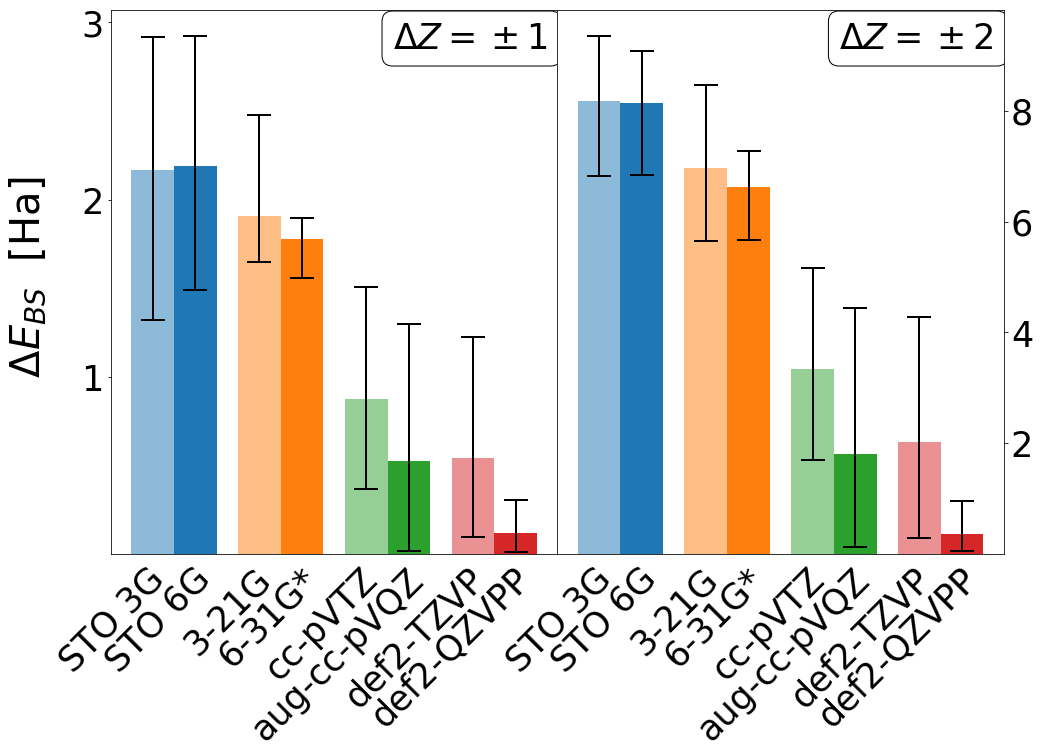

In [42]:
fig= plt.figure(figsize=(16,8))
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.axes().set_ylabel(r" $\Delta E_{BS} $  [Ha]",fontsize=40,labelpad=40)
plt.axes().set_frame_on(False)
subplspec={'wspace':0,}
axs=fig.subplots(1,2, sharex=True,gridspec_kw=subplspec)

axs[0].tick_params(axis='y',labelsize=35)

dz=1
ticks=[]
width=.4
for i in range(4):
    df=datasets[i*2].query("alchemy==0").copy()
    df['deltaZ']=[molecules[x] for x in df.target]
    df['deltaZ']-=[molecules[x] for x in df.ref]
    df['deltaZ']=np.abs(df['deltaZ'])
    df['bs_err']=np.abs(df.e_at_ref_bs-df.e_ccsd)
    
    yerr_v=np.abs(np.array([[df.query("deltaZ==@dz").bs_err.quantile(q=.1)],[df.query("deltaZ==@dz").bs_err.quantile(q=.9)]])\
               -df.query("deltaZ==@dz").bs_err.mean())
    axs[0].bar(i-width/2,(df.query("deltaZ==@dz").bs_err).mean(),width,color='C'+str(i),alpha=.5,\
yerr=yerr_v,capsize=12,error_kw={"capthick":2,"linewidth":2})
    
    
    df=datasets[i*2+1].query("alchemy==0").copy()
    df['deltaZ']=[molecules[x] for x in df.target]
    df['deltaZ']-=[molecules[x] for x in df.ref]
    df['deltaZ']=np.abs(df['deltaZ'])
    df['bs_err']=np.abs(df.e_at_ref_bs-df.e_ccsd)
    yerr_v=np.abs(np.array([[df.query("deltaZ==@dz").bs_err.quantile(q=.1)],[df.query("deltaZ==@dz").bs_err.quantile(q=.9)]])\
               -df.query("deltaZ==@dz").bs_err.mean())
    
    axs[0].bar(i+width/2,(df.query("deltaZ==@dz").bs_err).mean(),width,color='C'+str(i),yerr=yerr_v ,capsize=12\
               ,error_kw={"capthick":2,"linewidth":2})
    
    print(yerr_v)
    ticks.append(i-width/2+.17), ticks.append(i+width/2+.20)
    
axs[1].tick_params(axis='y',labelsize=35)
axs[1].yaxis.tick_right()

dz=2
width=.4
for i in range(4):
    df=datasets[i*2].query("alchemy==0").copy()
    df['deltaZ']=[molecules[x] for x in df.target]
    df['deltaZ']-=[molecules[x] for x in df.ref]
    df['deltaZ']=np.abs(df['deltaZ'])
    df['bs_err']=np.abs(df.e_at_ref_bs-df.e_ccsd)
    yerr_v=np.abs(np.array([[df.query("deltaZ==@dz").bs_err.quantile(q=.1)],[df.query("deltaZ==@dz").bs_err.quantile(q=.9)]])\
               -df.query("deltaZ==@dz").bs_err.mean())
    axs[1].bar(i-width/2,(df.query("deltaZ==@dz").bs_err).mean(),width,color='C'+str(i),alpha=.5,yerr=yerr_v,\
               error_kw={"capthick":2,"linewidth":2},capsize=12)
    
    df=datasets[i*2+1].query("alchemy==0").copy()
    df['deltaZ']=[molecules[x] for x in df.target]
    df['deltaZ']-=[molecules[x] for x in df.ref]
    df['deltaZ']=np.abs(df['deltaZ'])
    df['bs_err']=np.abs(df.e_at_ref_bs-df.e_ccsd)
    
    yerr_v=np.abs(np.array([[df.query("deltaZ==@dz").bs_err.quantile(q=.1)],[df.query("deltaZ==@dz").bs_err.quantile(q=.9)]])\
               -df.query("deltaZ==@dz").bs_err.mean())
    axs[1].bar(i+width/2,(df.query("deltaZ==@dz").bs_err).mean(),width,color='C'+str(i), yerr=yerr_v,capsize=12,\
               error_kw={"capthick":2,"linewidth":2})
   
    
    
axs[0].set_yticks((axs[0].get_yticks())[1:-1])
axs[0].set_xticks(ticks)
axs[0].set_xticklabels(['STO 3G','STO 6G', '3-21G','6-31G*','cc-pVTZ','aug-cc-pVQZ','def2-TZVP','def2-QZVPP'],\
                       rotation=45,fontsize=35,fontdict={"horizontalalignment":'right'})
axs[0].tick_params(axis='x', which='both', bottom=False,top=False,labelbottom=True)

axs[1].set_yticks((axs[1].get_yticks())[1:-1])
axs[1].set_xticks(ticks)
axs[1].set_xticklabels(['STO 3G','STO 6G', '3-21G','6-31G*','cc-pVTZ','aug-cc-pVQZ','def2-TZVP','def2-QZVPP'],\
                      rotation=45,fontsize=35,fontdict={"horizontalalignment":'right'})
axs[1].tick_params(axis='x', which='both', bottom=False,top=False,labelbottom=True)


box_params=dict(boxstyle='round', facecolor='white', alpha=1.)
axs[0].text(.57*axs[0].get_xlim()[1],.93*axs[0].get_ylim()[1],r'$\Delta Z=\pm 1$ ',clip_on=True,bbox=box_params, fontsize=35)
axs[1].text(.57*axs[1].get_xlim()[1],.93*axs[1].get_ylim()[1],r'$\Delta Z=\pm 2$ ',clip_on=True,bbox=box_params, fontsize=35)
fig.set_size_inches(16,10, forward=False)

fig.savefig('bs_error_stats.png', bbox_inches='tight')

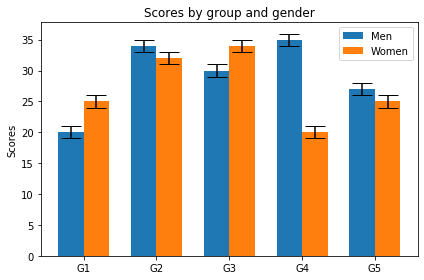

20

In [79]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, yerr=1, label='Men', capsize=10)
rects2 = ax.bar(x + width/2, women_means, width,  yerr=1,label='Women', capsize=10)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()
rects1[0].get_height()